In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhcb_data = pd.read_csv('Data/popularity-728days.csv')
lhcb_data.irow(range(0,3))

,Name,Configuration,ProcessingPass,FileType,Type,Creation-week,NbLFN,LFNSize,NbDisk,DiskSize,...,95,96,97,98,99,100,101,102,103,104
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08-MINBIAS-FIRST-14-NB/Stripping12d,MINIBIAS.DST,1,104591,67,0.317900,134,0.635799,...,12687,12687,12687,12687,12687,12687,12687,12687,12687,12687
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,BHADRON.DST,1,104607,227,0.649204,980,2.819260,...,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,CALIBRATION.DST,1,104607,355,1.370105,355,1.370105,...,0,0,0,474,708,708,708,708,708,708


In [17]:
test_data = lhcb_data.irow(np.random.choice(lhcb_data.index, 1000))
test_data.shape

(1000, 124)

In [18]:
risk_matrix = np.array([[0, 1],
                        [1000, 0]])

In [19]:
from datapop.LHCb import RecommendationSystem
rs = RecommendationSystem(forecast_horizont=26, class_abs_thresholds=1, risk_matrix=risk_matrix)
report = rs.report(data=test_data)

KFold prediction using folds column
KFold prediction using folds column


In [20]:
report.irow(range(0,5))

,ID,Proba_Type_0,Proba_Type_1,Risk_Type_0,Risk_Type_1,Recommended_Type
0,/MC/2011/Beam3500GeV-2011-MagUp-Nu2-Pythia8/Si...,0.0002894643,0.9997105,999.7105,0.0002894643,1
1,/MC/2011/Beam3500GeV-2011-MagDown-Nu2-EmNoCuts...,0.99994,5.99646e-05,0.0599646,0.99994,0
2,/MC/2011/Beam3500GeV-2011-MagUp-Nu2-50ns-EmNoC...,0.9994293,0.0005706808,0.5706808,0.9994293,0
3,/MC/2012/Beam4000GeV-MayJune2012-MagDown-Nu2.5...,0.0002135532,0.9997864,999.7864,0.0002135532,1
4,/MC/2012/Beam4000GeV-2012-MagUp-Nu2.5-Pythia8/...,0.0003363573,0.9996636,999.6636,0.0003363573,1


In [21]:
preprocessed_data = rs._get_preprocessed_data(test_data)
preprocessed_data.irow(range(0,5))

,ID,Creation,First,StartTime,Now,1,2,3,4,5,...,95,96,97,98,99,100,101,102,103,104
0,/MC/2011/Beam3500GeV-2011-MagUp-Nu2-Pythia8/Si...,104748,104749,104660,104764,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,/MC/2011/Beam3500GeV-2011-MagDown-Nu2-EmNoCuts...,104624,104665,104660,104764,0,0,0,0,192,...,0,0,0,0,0,0,0,0,0,0
2,/MC/2011/Beam3500GeV-2011-MagUp-Nu2-50ns-EmNoC...,104654,104661,104660,104764,104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,/MC/2012/Beam4000GeV-MayJune2012-MagDown-Nu2.5...,104675,104706,104660,104764,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,/MC/2012/Beam4000GeV-2012-MagUp-Nu2.5-Pythia8/...,104712,104722,104660,104764,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
rs._simulation_report(preprocessed_data).irow(range(0,5))

KFold prediction using folds column
KFold prediction using folds column


,ID,Proba_Type_0,Proba_Type_1,Risk_Type_0,Risk_Type_1,Recommended_Type
0,/MC/2011/Beam3500GeV-2011-MagUp-Nu2-EmNoCuts/S...,0.9998899,0.0001100967,0.1100967,0.9998899,0
1,/MC/2012/Beam4000GeV-2012-MagUp-Nu2.5-Pythia6/...,6.23083e-05,0.9999377,999.9377,6.23083e-05,1
2,/MC/2011/Beam3500GeV-2011-MagDown-Nu2-EmNoCuts...,0.0002202263,0.9997798,999.7798,0.0002202263,1
3,/MC/2011/Beam3500GeV-2011-MagDown-Nu2-EmNoCuts...,0.9999364,6.361208e-05,0.06361208,0.9999364,0
4,/MC/2012/Beam4000GeV-2012-MagDown-Nu2.5-Pythia...,0.02220118,0.9777988,977.7988,0.02220118,1


#Simulation

In [22]:
from datapop.LHCb import LHCbSimulator
sim = LHCbSimulator(data=test_data,\
                   begin=52, step=5,\
                   recommendation_system=rs)

In [23]:
reports, true_labels, rocs, mistakes, periods = sim._get_reports()

KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column


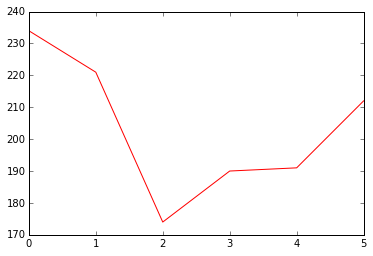

In [24]:
plt.plot(mistakes)